In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pathlib

In [293]:
train = pd.read_csv("C:\\Users\\ACER NITRO 5\\Desktop\\kaggle\\titanic\\data\\train.csv")
test = pd.read_csv("C:\\Users\\ACER NITRO 5\\Desktop\\kaggle\\titanic\\data\\test.csv")
submission = pd.read_csv("C:\\Users\\ACER NITRO 5\\Desktop\\kaggle\\titanic\\data\\sample_submission.csv")


# Đọc dữ liệu

In [294]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [295]:

train.shape

(8693, 14)

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [297]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [298]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [299]:
# Số phần tử null trong train
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [300]:
print("Categorical Variables")
categorical_variables = train.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [301]:
print("Numerical Variables")
numerical_variables = train._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


# Xử lý giá trị null trong các cột:
- Thay thế bằng các phần tử xuất hiện nhiều nhất trong cột với biến phân loại
- Thay thế bằng giá trị trung bình của cột


In [302]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        train[cat_col] = train[cat_col].fillna(train[cat_col].mode()[0]) 

In [303]:
for num_col in numerical_variables:
    train[num_col] = train[num_col].fillna(train[num_col].mean())

In [304]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

# Xử lý dữ liệu

In [305]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:title={'center':'HomePlanet'}>

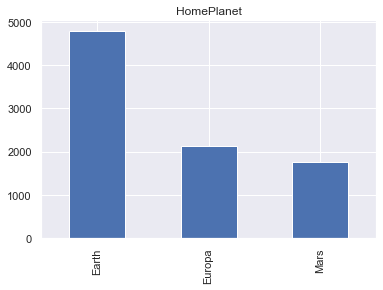

In [306]:
train['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')

<AxesSubplot:title={'center':'Destination'}>

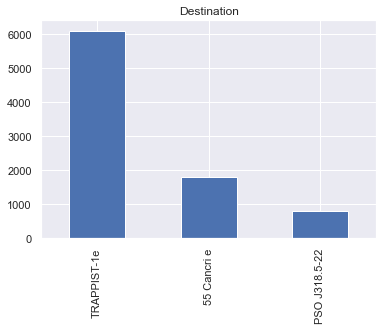

In [307]:
train['Destination'].value_counts().plot(kind='bar', title='Destination')

<AxesSubplot:title={'center':'CryoSleep'}>

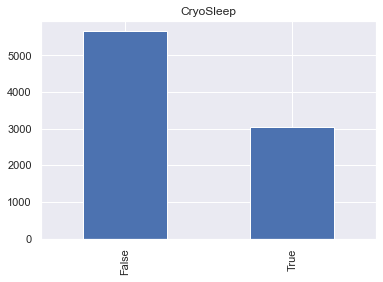

In [308]:
train['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')

<AxesSubplot:title={'center':'CryoSleep'}>

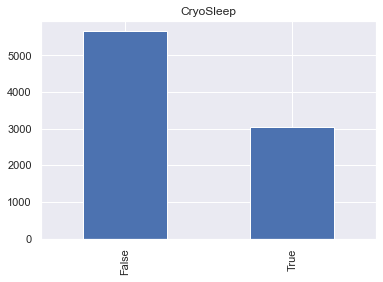

In [309]:
train['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')

<AxesSubplot:title={'center':'VIP'}>

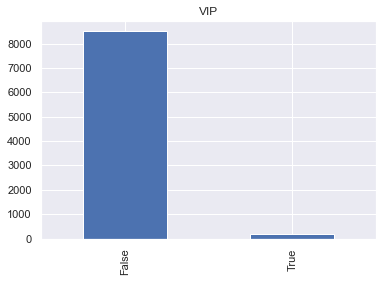

In [310]:
train['VIP'].value_counts().plot(kind='bar', title='VIP')

In [311]:
train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [312]:
train['Age_group'] = pd.cut(x=train['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
train['Age_group']

0       young adult
1       young adult
2        middle age
3       young adult
4             child
           ...     
8688     middle age
8689          child
8690    young adult
8691    young adult
8692     middle age
Name: Age_group, Length: 8693, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

<AxesSubplot:title={'center':'Age_group'}>

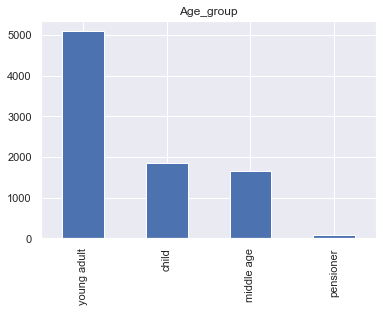

In [313]:
train['Age_group'].value_counts().plot(kind='bar', title='Age_group')

In [314]:
train['Age_group'].value_counts()

young adult    5097
child          1865
middle age     1647
pensioner        84
Name: Age_group, dtype: int64

In [315]:
train['Room_Service_group'] = pd.cut(x=train['RoomService'], bins=[-1, 2000, 8000, 12000], labels=['low', 'med', 'high'])
train['Room_Service_group']


0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: Room_Service_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<AxesSubplot:title={'center':'Room_Service_group'}>

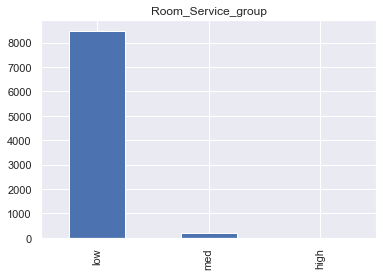

In [316]:
train['Room_Service_group'].value_counts().plot(kind='bar', title='Room_Service_group')

In [317]:
train['Room_Service_group'].value_counts()/len(train)

low     0.976303
med     0.022662
high    0.000920
Name: Room_Service_group, dtype: float64

In [318]:
train['Food_Court_group'] = pd.cut(x=train['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels=['low', 'med', 'high'])
train['Food_Court_group']

0       low
1       low
2       low
3       low
4       low
       ... 
8688    med
8689    low
8690    low
8691    low
8692    low
Name: Food_Court_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<AxesSubplot:title={'center':'Food_Court_group'}>

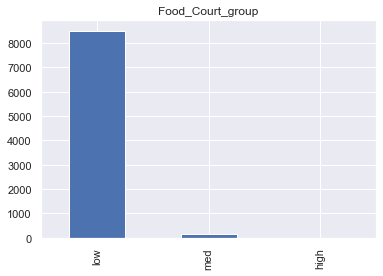

In [319]:
train['Food_Court_group'].value_counts().plot(kind='bar', title='Food_Court_group')

In [320]:
train['Shopping_group'] = pd.cut(x=train['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels=['low', 'med', 'high'])
train['Shopping_group']

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: Shopping_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<AxesSubplot:title={'center':'Shopping_group'}>

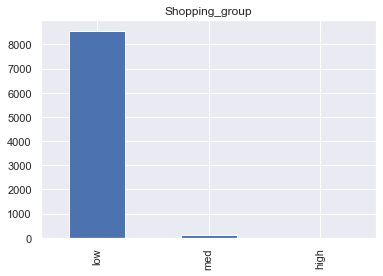

In [321]:
train['Shopping_group'].value_counts().plot(kind='bar', title='Shopping_group')

In [322]:
train['Spa_group'] = pd.cut(x=train['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
train['Spa_group']

0       low
1       low
2       med
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: Spa_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<AxesSubplot:title={'center':'Spa_group'}>

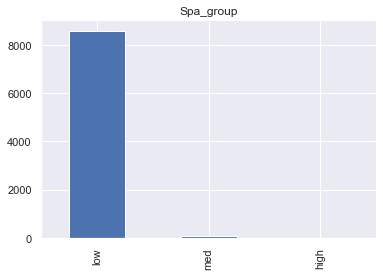

In [323]:
train['Spa_group'].value_counts().plot(kind='bar', title='Spa_group')

In [324]:
train['VR_group'] = pd.cut(x=train['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
train['VR_group']

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: VR_group, Length: 8693, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<AxesSubplot:title={'center':'VR_group'}>

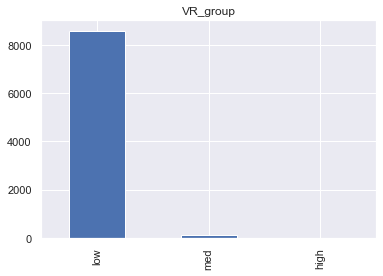

In [325]:
train['VR_group'].value_counts().plot(kind='bar', title='VR_group')

In [326]:
target = train['Transported']
train.drop("Transported", axis=1)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_group,Room_Service_group,Food_Court_group,Shopping_group,Spa_group,VR_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,young adult,low,low,low,low,low
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,young adult,low,low,low,low,low
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,middle age,low,low,low,med,low
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,young adult,low,low,low,low,low
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,child,low,low,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,middle age,low,med,low,low,low
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,child,low,low,low,low,low
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,young adult,low,low,low,low,low
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,young adult,low,low,low,low,low


In [327]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age_group", "Room_Service_group", "Food_Court_group", "Shopping_group", "Spa_group", "VR_group"]
y = target
X = train[features][: len(train)]
X_test = train[features][len(train) :]

In [328]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape


((6954, 9), (6954,), (1739, 9), (1739,))

<AxesSubplot:>

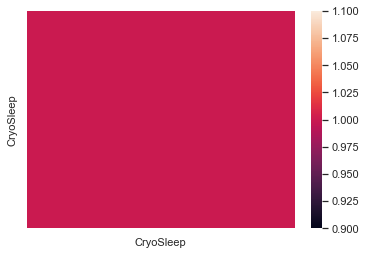

In [329]:
cmap = train[features].corr()
sns.heatmap(cmap)

ValueError: could not convert string to float: 'TRAPPIST-1e'